In [1]:
from tasks import run_omm_on_gpu 
import GPUtil
import os 

import subprocess
import threading

In [2]:
from tasks import app

app.conf.timezone='EST'

In [3]:
from utils import start_worker, start_flower_monitor, omm_jobs

In [6]:
top_file = '/home/hm0/Research/molecules/MD_CVAE/P27-all/C1B48/C1B48.top.gz'
pdb_file = '/home/hm0/Research/molecules/MD_CVAE/P27-all/C1B48/C1B48.pdb.gz'

In [4]:
start_worker(app)
start_flower_monitor()

## Jobs

In [7]:
job0 = omm_jobs(1, 1, top_file, pdb_file)

In [12]:
type(job0.job)

celery.result.AsyncResult

In [10]:
job0.start()

# File op

In [10]:
import sys
sys.path.append('/home/hm0/Research/molecules/molecules_git/build/lib')
from molecules.utils.matrix_op import triu_to_full

In [11]:
from glob import glob

In [12]:
cm_files = glob('*/*_cm.h5')
cm_files

['omm_run0/output_cm.h5', 'omm_run1/output_cm.h5']

In [7]:
import h5py 

In [8]:
import numpy as np

In [9]:
def read_h5py_file(h5_file): 
    pass

In [10]:
cm_h5 = h5py.File('omm_run0/output_cm.h5', 'r', libver='latest', swmr=True)

In [11]:
cm_dict = cm_h5[u'contact_maps']

# Get updates from h5 file

In [17]:
cm_dict.refresh()
cm_dict.shape

(1326, 40)

In [44]:
cm_h5.close()

In [22]:
cm_dia = [cm_h5[i] for i in sorted(cm_h5.keys(), key=lambda x: int(x))]

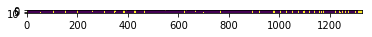

In [59]:
plt.imshow(cm_dia)

In [39]:
cm0_f5 = cm_h5[0][u'contact_maps']['100']

In [43]:
import matplotlib.pyplot as plt

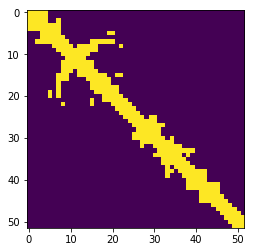

In [44]:
plt.imshow(triu_to_full(cm_h5[0][u'contact_maps']['100']))

# Observer 

In [ ]:
import sys
import time
import logging
from watchdog.observers import Observer
from watchdog.events import LoggingEventHandler

if __name__ == "__main__":
    logging.basicConfig(level=logging.INFO,
                        format='%(asctime)s - %(message)s',
                        datefmt='%Y-%m-%d %H:%M:%S')
    path =  './'
    event_handler = LoggingEventHandler()
    observer = Observer()
    observer.schedule(event_handler, path, recursive=True)
    observer.start()
    try:
        while True:
            time.sleep(1)
    except KeyboardInterrupt:
        observer.stop()
    observer.join()

In [12]:
import time

In [13]:
with open('./omm_run0/output.log', 'r') as f: 
    while True: 
        line = f.readline()
        if line: 
            print line 
        else: 
            time.sleep(1)

KeyboardInterrupt: 

In [19]:
f = open('./omm_run0/output.log', 'r')

In [21]:
f.readlines()

['50000,99.9999999999,-320648.826037,-258752.032986,295.961367117,0\n',
 '100000,200.0,-320686.157694,-257807.677094,300.65533549,281\n',
 '150000,300.000000001,-319829.690838,-257411.342559,298.455199033,280\n',
 '200000,400.000000001,-319803.240964,-256619.969006,302.112704484,280\n',
 '250000,500.000000002,-321007.288116,-257947.891031,301.520393073,279\n',
 '300000,600.0,-320486.333445,-258187.077182,297.885757001,279\n',
 '350000,699.999999997,-320339.472957,-257591.250546,300.032502067,276\n',
 '400000,799.999999995,-320595.665351,-258451.643062,297.143501111,272\n',
 '450000,899.999999993,-319371.773954,-256335.490629,301.409873944,269\n',
 '500000,999.99999999,-321529.179159,-259992.348394,294.240196679,267\n']

In [40]:
f = h5py.File("swmr.h5", 'w', libver='latest')
arr = np.array([1,2,3,4])
dset = f.create_dataset("data", chunks=(2,), maxshape=(None,), data=arr)
f.swmr_mode = True
# Now it is safe for the reader to open the swmr.h5 file
for i in range(5):
    new_shape = ((i+1) * len(arr), )
    dset.resize( new_shape )
    dset[i*len(arr):] = arr
    dset.flush()

    # Notify the reader process that new data has been written

In [1]:
import h5py

In [3]:
f.keys()

[u'1100',
 u'1900',
 u'200',
 u'300',
 u'1700',
 u'100',
 u'1000',
 u'700',
 u'400',
 u'900',
 u'1200',
 u'1500',
 u'1800',
 u'1300',
 u'500',
 u'1400',
 u'1600',
 u'2000',
 u'600',
 u'800']

In [4]:
f = h5py.File("./swmr.h5", 'r', libver='latest', swmr=True)
dset = f["data"]
while True:
    dset.id.refresh()
    shape = dset.shape
    print( shape )

(673240,)
(673248,)
(673248,)
(673252,)
(673252,)
(673256,)
(673256,)
(673260,)
(673260,)
(673264,)
(673264,)
(673268,)
(673268,)
(673272,)
(673272,)
(673276,)
(673276,)
(673280,)
(673280,)
(673284,)
(673284,)
(673288,)
(673288,)
(673292,)
(673292,)
(673292,)
(673296,)
(673300,)
(673304,)
(673304,)
(673308,)
(673308,)
(673312,)
(673316,)
(673316,)
(673320,)
(673320,)
(673324,)
(673324,)
(673328,)
(673328,)
(673332,)
(673332,)
(673336,)
(673340,)
(673340,)
(673344,)
(673344,)
(673348,)
(673348,)
(673348,)
(673352,)
(673356,)
(673356,)
(673360,)
(673360,)
(673360,)
(673364,)
(673364,)
(673368,)
(673368,)
(673372,)
(673376,)
(673376,)
(673380,)
(673380,)
(673380,)
(673384,)
(673388,)
(673388,)
(673392,)
(673396,)
(673396,)
(673400,)
(673400,)
(673404,)
(673404,)
(673408,)
(673408,)
(673412,)
(673412,)
(673416,)
(673416,)
(673420,)
(673420,)
(673424,)
(673424,)
(673428,)
(673432,)
(673432,)
(673436,)
(673436,)
(673440,)
(673440,)
(673444,)
(673444,)
(673448,)
(673448,)
(673452,)
(673452,)


KeyboardInterrupt: 

In [39]:
f.close()